# What is Pandas?
Pandas is a software library written for the Python programming language for data manipulation and analysis.

Author : Mahimai Raja J <br>
Nickname : iKurious
<hr>

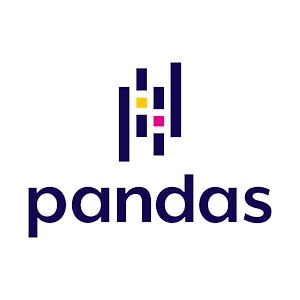


---




In [1]:
import pandas as pd

In [2]:
pd.__version__ #Now that we imported pandas lets check its version.

'1.2.4'

# Creating Data

There are two core objects in pandas: the **DataFrame** and the **Series**.
DataFrame is a table, a Series is a list.




In [3]:
s = pd.Series([2,4,6,8])
print(s)

0    2
1    4
2    6
3    8
dtype: int64


A DataFrame is a tablular data structure (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.

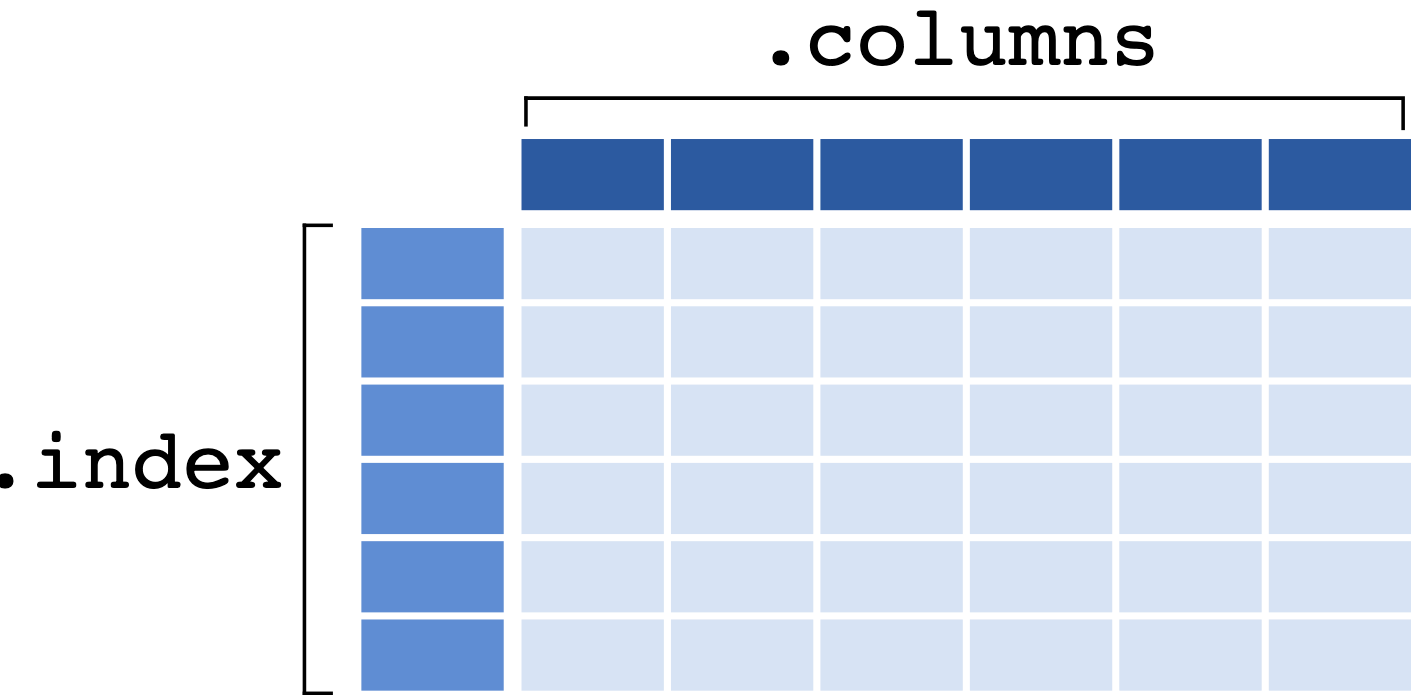

In [4]:
data = {
    'apples':[2,4,6,8],
    'oranges':[2,4,6,8]
}

df = pd.DataFrame({'apples':[2,4,6,8], 'oranges':[2,4,6,8]})
df

,apples,oranges
0,2,2
1,4,4
2,6,6
3,8,8


In [5]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}
type(data)

dict

In [6]:
fruits = pd.DataFrame(data)
fruits

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


#### Each (key, value) item in data corresponds to a column in the resulting DataFrame.


In [7]:
purchases = pd.DataFrame(data, index=['June', 'July', 'Aug', 'Sep'])
purchases

,apples,oranges
June,3,0
July,2,3
Aug,0,7
Sep,1,2


# Reading data files
To read a CSV file locally from your system

In [7]:
from google.colab import files
uploaded_file = files.upload()


# I am trying this in jupyter notebook 
# You can try this by --> pip install google.colab 

ModuleNotFoundError: No module named 'google.colab'

*   pd.read_csv()    - Used to read a CSV file
*   pd.read_html()   - Used to read a HTML file
*   pd.read_excel()  - Used to read a xlsx file
*   pd.read_json()   - Used to read a JSON file
*   pd.read_sql()    - Used to read a SQL file

In [8]:
df = pd.read_csv('elections.csv')
df

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
8,Bush,Republican,37.4,1992,loss
9,Perot,Independent,18.9,1992,loss


## Indexing and Selecting 

In [9]:
df.Candidate

0       Reagan
1       Carter
2     Anderson
3       Reagan
4      Mondale
5         Bush
6      Dukakis
7      Clinton
8         Bush
9        Perot
10     Clinton
11        Dole
12       Perot
13        Gore
14        Bush
15       Kerry
16        Bush
17       Obama
18      McCain
19       Obama
20      Romney
21     Clinton
22       Trump
Name: Candidate, dtype: object

In [10]:
df['Result']

0      win
1     loss
2     loss
3      win
4     loss
5      win
6     loss
7      win
8     loss
9     loss
10     win
11    loss
12    loss
13    loss
14     win
15    loss
16     win
17     win
18    loss
19     win
20    loss
21    loss
22     win
Name: Result, dtype: object

In [11]:
df['Candidate'][5]

'Bush'

In [12]:
col= ['Candidate', 'Result']
df[col]

,Candidate,Result
0,Reagan,win
1,Carter,loss
2,Anderson,loss
3,Reagan,win
4,Mondale,loss
5,Bush,win
6,Dukakis,loss
7,Clinton,win
8,Bush,loss
9,Perot,loss


***Index-based selection***

Pandas indexing works in one of two paradigms. The first is index-based selection: selecting data based on its numerical position in the data. iloc follows this paradigm.

To select the first row of data in a DataFrame, we may use the following:

In [14]:
df.columns

Index(['Candidate', 'Party', '%', 'Year', 'Result'], dtype='object')

In [17]:
df['%']

0     50.7
1     41.0
2      6.6
3     58.8
4     37.6
5     53.4
6     45.6
7     43.0
8     37.4
9     18.9
10    49.2
11    40.7
12     8.4
13    48.4
14    47.9
15    48.3
16    50.7
17    52.9
18    45.7
19    51.1
20    47.2
21    48.2
22    46.1
Name: %, dtype: float64

In [18]:
df.loc[df['%'] >50]

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
3,Reagan,Republican,58.8,1984,win
5,Bush,Republican,53.4,1988,win
16,Bush,Republican,50.7,2004,win
17,Obama,Democratic,52.9,2008,win
19,Obama,Democratic,51.1,2012,win


In [19]:
df.iloc[0]

Candidate        Reagan
Party        Republican
%                  50.7
Year               1980
Result              win
Name: 0, dtype: object

In [20]:
df.iloc[0:3,0:2]

,Candidate,Party
0,Reagan,Republican
1,Carter,Democratic
2,Anderson,Independent


In [21]:
df.iloc[[0,1],[0,4]]

,Candidate,Result
0,Reagan,win
1,Carter,loss


**Label-based selection**

The second paradigm for attribute selection is the one followed by the loc operator: label-based selection. In this paradigm, it's the data index value, not its position, which matters.

In [22]:
df.loc[0]

Candidate        Reagan
Party        Republican
%                  50.7
Year               1980
Result              win
Name: 0, dtype: object

In [23]:
df.loc[0,'Candidate']

'Reagan'

In [24]:
df.loc[:, ['Candidate', 'Result']]

,Candidate,Result
0,Reagan,win
1,Carter,loss
2,Anderson,loss
3,Reagan,win
4,Mondale,loss
5,Bush,win
6,Dukakis,loss
7,Clinton,win
8,Bush,loss
9,Perot,loss


**Conditional Selection**

In [25]:
df.Party == 'Republican'

0      True
1     False
2     False
3      True
4     False
5      True
6     False
7     False
8      True
9     False
10    False
11     True
12    False
13    False
14     True
15    False
16     True
17    False
18     True
19    False
20     True
21    False
22     True
Name: Party, dtype: bool

In [26]:
df.loc[df.Party=='Republican']

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
3,Reagan,Republican,58.8,1984,win
5,Bush,Republican,53.4,1988,win
8,Bush,Republican,37.4,1992,loss
11,Dole,Republican,40.7,1996,loss
14,Bush,Republican,47.9,2000,win
16,Bush,Republican,50.7,2004,win
18,McCain,Republican,45.7,2008,loss
20,Romney,Republican,47.2,2012,loss
22,Trump,Republican,46.1,2016,win


## Exercises

1. Print the last row.

In [29]:
df.loc[22]

Candidate         Trump
Party        Republican
%                  46.1
Year               2016
Result              win
Name: 22, dtype: object

2. Select the Year column and assign to a variable *yrs*.

In [30]:
df['yrs'] = df['Year']
df

,Candidate,Party,%,Year,Result,yrs
0,Reagan,Republican,50.7,1980,win,1980
1,Carter,Democratic,41.0,1980,loss,1980
2,Anderson,Independent,6.6,1980,loss,1980
3,Reagan,Republican,58.8,1984,win,1984
4,Mondale,Democratic,37.6,1984,loss,1984
5,Bush,Republican,53.4,1988,win,1988
6,Dukakis,Democratic,45.6,1988,loss,1988
7,Clinton,Democratic,43.0,1992,win,1992
8,Bush,Republican,37.4,1992,loss,1992
9,Perot,Independent,18.9,1992,loss,1992


3. Select the first ten rows and print them.

In [46]:
df.iloc[:10,:]

,Candidate,Party,%,Year,Result,yrs
0,Reagan,Republican,50.7,1980,win,1980
1,Carter,Democratic,41.0,1980,loss,1980
2,Anderson,Independent,6.6,1980,loss,1980
3,Reagan,Republican,58.8,1984,win,1984
4,Mondale,Democratic,37.6,1984,loss,1984
5,Bush,Republican,53.4,1988,win,1988
6,Dukakis,Democratic,45.6,1988,loss,1988
7,Clinton,Democratic,43.0,1992,win,1992
8,Bush,Republican,37.4,1992,loss,1992
9,Perot,Independent,18.9,1992,loss,1992


4. Select the records with index labels 1, 2, 3, 5, and 8, assigning the result to the variable *sample*

In [48]:
sample = df.iloc[[1,2,3,5,8],:]
sample

,Candidate,Party,%,Year,Result,yrs
1,Carter,Democratic,41.0,1980,loss,1980
2,Anderson,Independent,6.6,1980,loss,1980
3,Reagan,Republican,58.8,1984,win,1984
5,Bush,Republican,53.4,1988,win,1988
8,Bush,Republican,37.4,1992,loss,1992


5. Create a variable containing the Candidate, Party, Result, and % columns of the records with the index labels 0, 1, 10, and 20. 

In [56]:
sample = df.loc[[0,1,10,20],['Candidate','Party','Result','%']]
sample

,Candidate,Party,Result,%
0,Reagan,Republican,win,50.7
1,Carter,Democratic,loss,41.0
10,Clinton,Democratic,win,49.2
20,Romney,Republican,loss,47.2


6. Create a variable containing the Candidate and Result columns of the first 10 records.

In [58]:
sample = df.loc[:9,['Candidate','Result']]
sample

,Candidate,Result
0,Reagan,win
1,Carter,loss
2,Anderson,loss
3,Reagan,win
4,Mondale,loss
5,Bush,win
6,Dukakis,loss
7,Clinton,win
8,Bush,loss
9,Perot,loss


7. Create a DataFrame containing Candidates and Year who have won.

In [62]:
sample = df.loc[:,['Candidate','Result']][df.Result == 'win']
sample

,Candidate,Result
0,Reagan,win
3,Reagan,win
5,Bush,win
7,Clinton,win
10,Clinton,win
14,Bush,win
16,Bush,win
17,Obama,win
19,Obama,win
22,Trump,win


8. Find the list of candidates whose % is less that 40

In [63]:
sample = df.loc[:,['Candidate','%']][df['%'] < 40]
sample

,Candidate,%
2,Anderson,6.6
4,Mondale,37.6
8,Bush,37.4
9,Perot,18.9
12,Perot,8.4


9. Find the list of democratic party candidates whose % is greater than 40

In [71]:
sample = df.loc[:,['Candidate','%']][df['%'] > 40]
sample

,Candidate,%
0,Reagan,50.7
1,Carter,41.0
3,Reagan,58.8
5,Bush,53.4
6,Dukakis,45.6
7,Clinton,43.0
10,Clinton,49.2
11,Dole,40.7
13,Gore,48.4
14,Bush,47.9


10. Find the list of candidates who have won after 2000 and have % greater than 50.

In [73]:
sample = df.loc[:,['Candidate','Year','%']][df['%'] > 20][df['Year'] > 2000]
sample

/Users/mahimairaja/opt/anaconda3/envs/dlearn/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Candidate,Year,%
15,Kerry,2004,48.3
16,Bush,2004,50.7
17,Obama,2008,52.9
18,McCain,2008,45.7
19,Obama,2012,51.1
20,Romney,2012,47.2
21,Clinton,2016,48.2
22,Trump,2016,46.1


# Working with DataFrames

In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving titanic.csv to titanic.csv


In [75]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
#lets get a better understanding about our dataframe
df.shape

(891, 12)

In [78]:
891 * 12

10692

In [79]:
df.size  # ---> Total number of records or values in the dataframe

10692

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [84]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [85]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [87]:
#Now lets view last five rows of our data
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [88]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Fynney, Mr. Joseph J",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [89]:
df['Survived'].sum()

342

In [90]:
df['Age'].min()

0.42

In [91]:
df['Age'].max()

80.0

In [92]:
df['Age'].mean()

29.69911764705882

In [93]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [94]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [95]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [96]:
#returns the number of unique values for each column
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [97]:
df.sort_values("Fare", ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [98]:
df = df.drop(labels = ["Cabin"], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [102]:
#Write code to drop Ticket column
sample = df.drop(labels=['Ticket'],axis=1)
sample.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [103]:
med = df['Age'].median()
df['Age'] = df['Age'].fillna(med)
df.shape

(891, 11)

In [104]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Exercises

1. What is the mean value of fare?

In [105]:
egMean = df.Fare.mean()
print(egMean)

32.204207968574636


2. What is the count of survivors by gender?

In [106]:
df.loc[df['Sex']=='female'].count()

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            314
SibSp          314
Parch          314
Ticket         314
Fare           314
Embarked       312
dtype: int64

3. Which social class had a better chance of survival?

In [108]:
classmean = df.Pclass.mean()
print(classmean)

2.308641975308642


4. What is the min and max fare?

In [107]:
egMin = df.Fare.min()
egMax = df.Fare.max()
print(f'Min fare = {egMin}\nMax fare = {egMax}')

Min fare = 0.0
Max fare = 512.3292


5. How many senior citizens were travelling?

In [117]:
aged = df['Age'][df['Age'] > 50]
aged.count()

64

In [118]:
# ---> people above age of 50 is = 64

## Data Visualization

In [119]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv") 
print(data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [120]:
data.columns
data.shape

(150, 5)

`Matplotlib` is one of the most popular Python packages used for data visualization.

In [121]:
# Import Pyplot module from Matplotlib package
import matplotlib.pyplot as plt

`Scatter plots` are used to plot data points on horizontal and vertical axis in the attempt to show how much one variable is affected by another. 

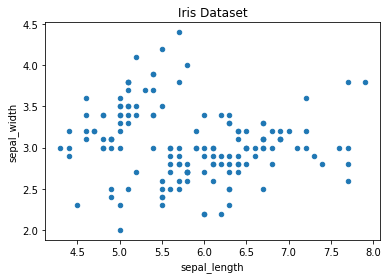

In [ ]:
# x-axis => sepal_length
# y-axis => sepal_width
# title => Iris Dataset
data.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')

Matplotlib has the concept of `subplots`: groups of smaller axes that can exist together within a single figure.

* To compare different views of data side by side
```
data.plot.hist(

    subplots=True, # True to view every data side by side

    layout=(2,2), # Grid size 2X2
  
    figsize=(10, 10), # width and height in inches
  
    bins=20  # number of intervals you want to divide all of your data into, such that it can be displayed as bars on a histogram
)
```


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faedf9dfd50>,
      dtype=object)

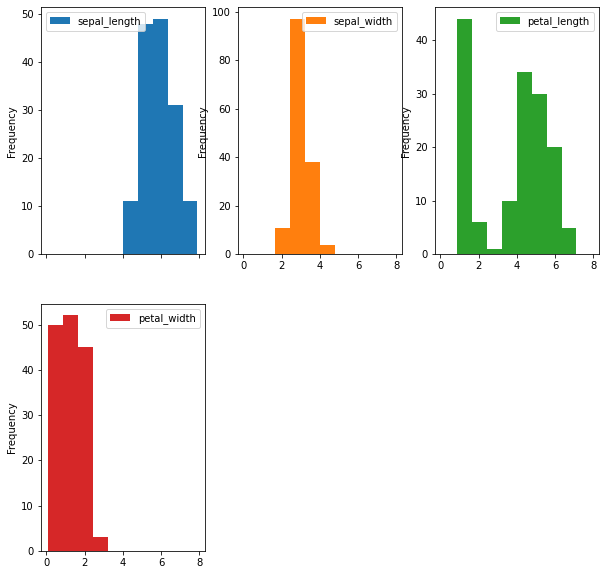

In [ ]:
data.plot.hist(subplots=True, layout=(2,3), figsize=(10, 10), bins=10)

---
`Seaborn` is a Python data visualization library based on matplotlib. 
* It provides a high-level interface for drawing attractive and informative statistical graphics.
* It uses Matplotlib underneath to plot graphs.

In [ ]:
# Import the Seaborn module 
import seaborn as sns

To plot a graph with sepal_length vs sepal_width👇

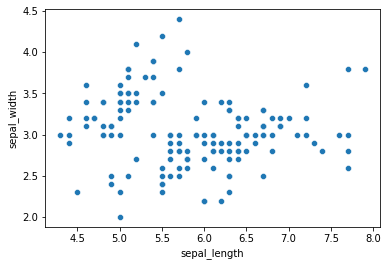

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=data)

💁To `group data points` on the basis of category - `species`

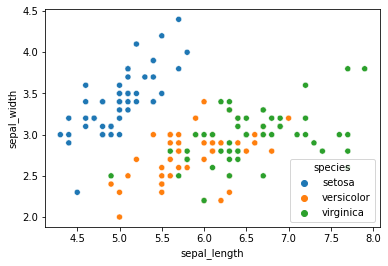

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data)

To draw a graph with column, sepal_length dropped👇

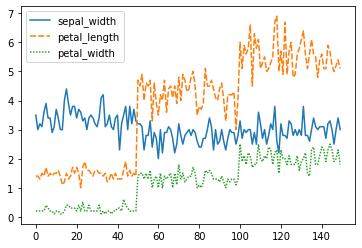

In [ ]:
sns.lineplot(data=data.drop(['sepal_length'], axis=1))

# **Box Plot**

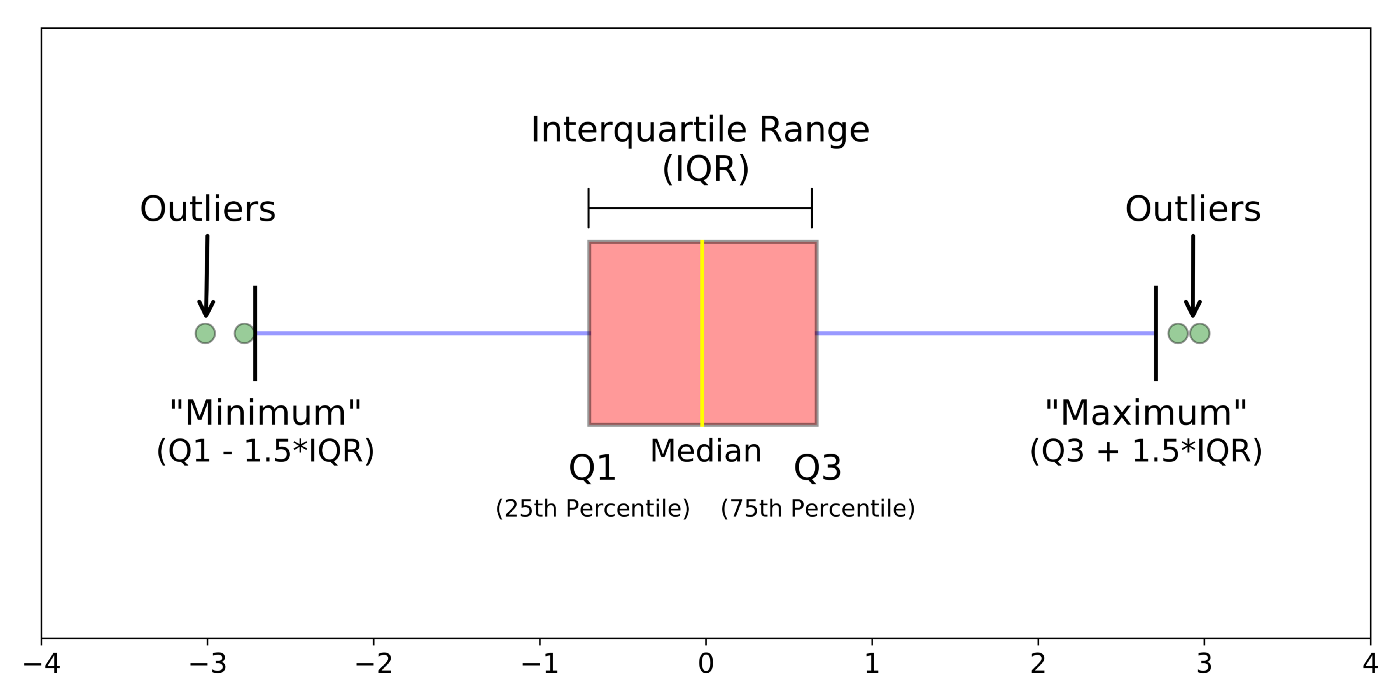

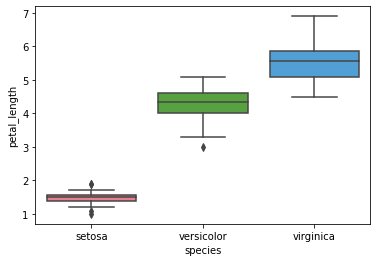

In [ ]:
# We can look at an individual feature in Seaborn through mnay different kinds of plots. 
# Here's a boxplot
sns.boxplot(x="species", y="petal_length", palette="husl", data=data)

😇A very simple way to find [correlation](https://www.investopedia.com/terms/c/correlation.asp) for dataset in your research work

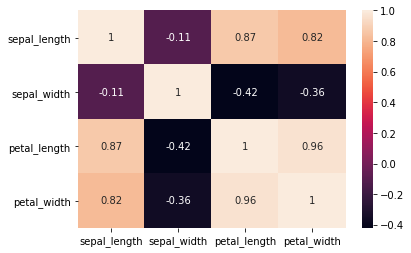

In [ ]:
sns.heatmap(data.corr(), annot=True)

To plot multiple pairwise bivariate distributions in a dataset👇

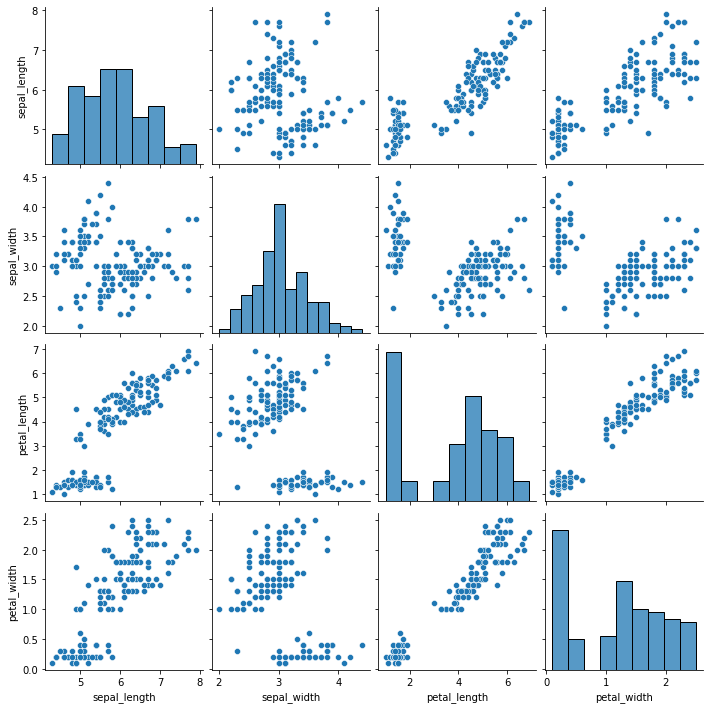

In [ ]:
sns.pairplot(data)

Group it based on species👨‍🏫

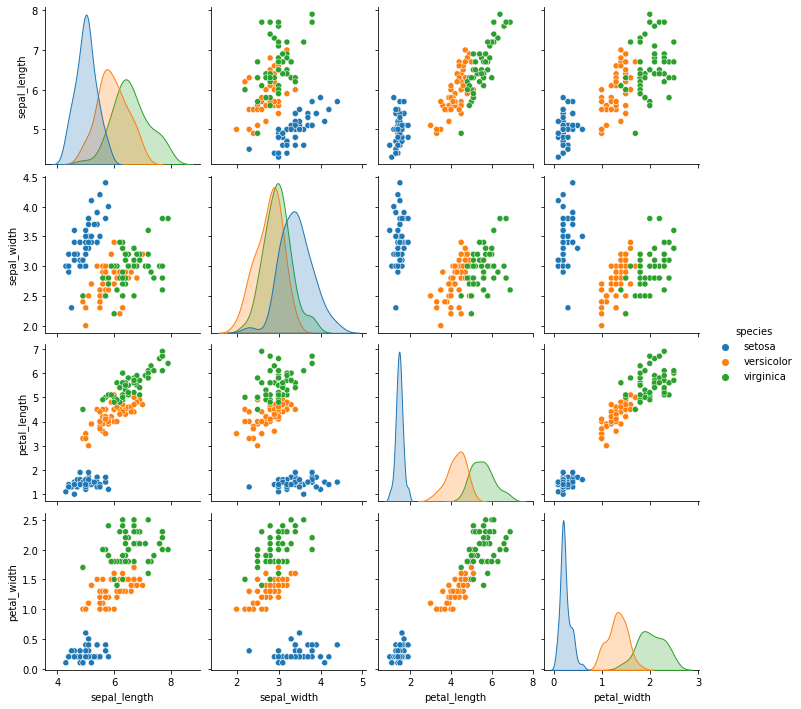

In [ ]:
sns.pairplot(data, hue='species')


##Exercises

1. Plot the various plots using the Titanic dataset.